# title

## runtime-breakdown

### original h1


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np
import math
import seaborn as sns
sns.set(style="darkgrid")

In [2]:
dir_path = os.path.abspath('')

with open(dir_path+"/vrf-runtime-breakdown/stat.csv") as breakdown_file: 
    lines = breakdown_file.readlines()

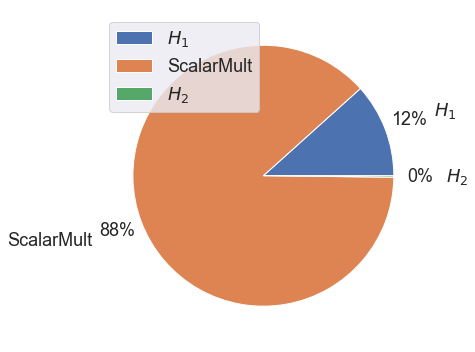

In [3]:
df = pd.read_csv("./vrf-runtime-breakdown/stat.csv")
df_runtime = df[:3]
# print(df_runtime)

xs = df_runtime['name'].to_numpy(dtype=str)
xs = [r'$H_1$', 'ScalarMult', r'$H_2$']
ys = df_runtime['time/op (ns/op)'].to_numpy(dtype=np.float64)

fig = plt.figure(figsize=(8, 6))
plt.pie(ys, labels=xs, autopct='%1.0f%%'
        , pctdistance=1.2
        , labeldistance=1.4
        , textprops={'fontsize': 18})
plt.legend(fontsize=18, loc='upper left')

plt.savefig('../../paper/figs/runtime-breakdown.eps')

In [4]:
labels = []
sizes = []
for i in range(len(lines)):
    if lines[i].startswith("name,alloc/op"):
        for j in range(1, 4):
            data = lines[i+j].split(",")
            labels.append(data[0][:-3])
            sizes.append(data[1])
            explode.append(0.1)

plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

NameError: name 'explode' is not defined

In [ ]:
labels = []
sizes = []
for i in range(len(lines)):
    if lines[i].startswith("name,allocs/op"):
        for j in range(1, 4):
            data = lines[i+j].split(",")
            labels.append(data[0][:-3])
            sizes.append(data[1])
            explode.append(0.1)

plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

## runtime-comparison

In [5]:
with open(dir_path+"/runtime-comparison/stat.csv") as comparison_file: 
    lines = comparison_file.readlines()

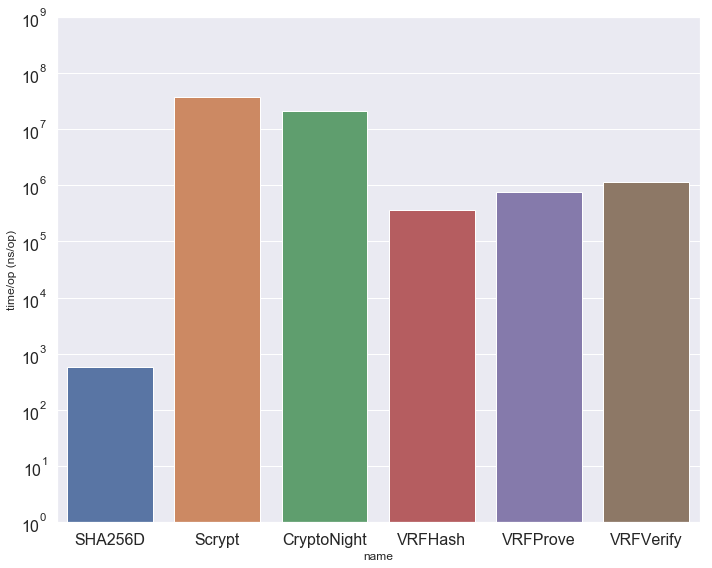

In [9]:
df = pd.read_csv(dir_path+"/runtime-comparison/stat.csv")
runtime_df = df.head(6)

for _, row in runtime_df.iterrows():
    row['name'] = row['name'][:-3]
    if row['name'] == 'Compute':
        row['name'] = 'VRFHash'
    if row['name'] == 'Prove':
        row['name'] = 'VRFProve'
    if row['name'] == 'Verify':
        row['name'] = 'VRFVerify'
    
xs = runtime_df['name']
ys = runtime_df['time/op (ns/op)'].astype('float64')

plt.figure(figsize=(10,8))
g=sns.barplot(xs, ys)
plt.yscale('log')
plt.ylim([1, 10**9])

plt.xlabel('Algorithm')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.tight_layout()
plt.savefig('../../paper/figs/runtime-comparison.eps')

In [ ]:
algos = []
performances = []
for i in range(len(lines)):
    if lines[i].startswith("name,alloc/op"):
        for j in range(1, 6):
            data = lines[i+j].split(",")
            algos.append(data[0][:-3])
            performances.append(float(data[1]))

index = np.arange(len(algos))
plt.bar(index, performances, align='center', alpha=0.5)
plt.xticks(index, algos)
plt.yscale("log")
plt.ylabel('allocs/op')
plt.title('Runtime comparison (memory)')

plt.show()

In [ ]:
algos = []
performances = []
for i in range(len(lines)):
    if lines[i].startswith("name,allocs/op"):
        for j in range(1, 6):
            data = lines[i+j].split(",")
            algos.append(data[0][:-3])
            performances.append(float(data[1]))

index = np.arange(len(algos))
plt.bar(index, performances, align='center', alpha=0.5)
plt.xticks(index, algos)
plt.ylabel('allocs/op (allocs/op)')
plt.title('Runtime comparison (memory)')

plt.show()